The wavelength of the lowest spectral pit is: 415.00 nm


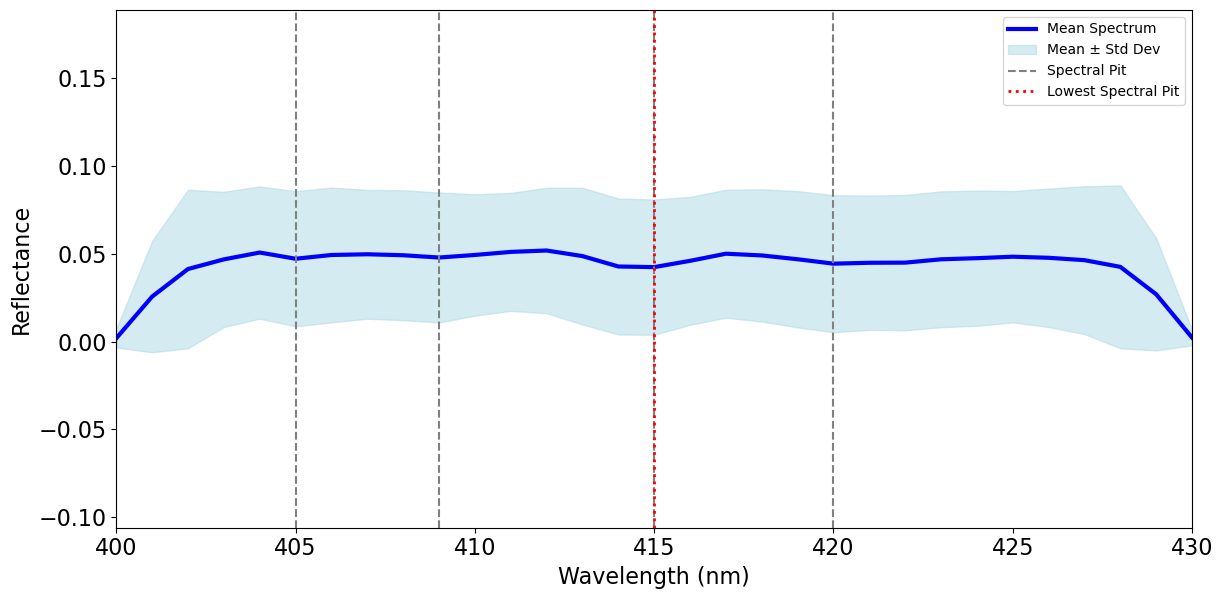

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.spatial import ConvexHull

# Load the data
dataframe_path = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\fire.xlsx"
try:
    df = pd.read_excel(dataframe_path)
except Exception as e:
    print(f"Error loading the data: {e}")
    exit()

# Prepare the feature (X) and target (y) variables
X = df.iloc[:, 5:]  # Raw spectral data (400 to 2500 nm)
flavonoids = df.iloc[:, 3]  # Flavonoids column
phenolics = df.iloc[:, 4]   # Phenolics column

# Select only the columns corresponding to the range 400 to 430 nm
wavelengths = X.columns.values
mask = (wavelengths >= 400) & (wavelengths <= 430)
X_filtered = X.loc[:, mask]

# Perform continuum removal using convex hull
X_cont_removed = np.zeros_like(X_filtered)
for i in range(X_filtered.shape[0]):
    spectrum = X_filtered.iloc[i, :].values
    points = np.column_stack((wavelengths[mask], spectrum))
    hull = ConvexHull(points)
    hull_values = np.zeros_like(spectrum)
    for vertex in hull.vertices:
        hull_values[vertex] = spectrum[vertex]
    X_cont_removed[i, :] = spectrum - hull_values

# Calculate mean and standard deviation
mean_spectrum = np.mean(X_cont_removed, axis=0)
std_spectrum = np.std(X_cont_removed, axis=0)

# Smooth the continuum-removed spectra
smooth_mean_spectrum = savgol_filter(mean_spectrum, window_length=5, polyorder=2)
smooth_std_spectrum = savgol_filter(std_spectrum, window_length=5, polyorder=2)

# Convert to numeric and handle NaN values
smooth_mean_spectrum = np.nan_to_num(pd.to_numeric(smooth_mean_spectrum, errors='coerce'))
smooth_std_spectrum = np.nan_to_num(pd.to_numeric(smooth_std_spectrum, errors='coerce'))

# Ensure all arrays are numeric and of the same shape
wavelengths_masked = pd.to_numeric(wavelengths[mask], errors='coerce')

# Identify the indices of the local minima in the smoothed mean spectrum
minima_indices = np.where((smooth_mean_spectrum[1:-1] < smooth_mean_spectrum[:-2]) & 
                          (smooth_mean_spectrum[1:-1] < smooth_mean_spectrum[2:]))[0] + 1

# Get the wavelengths corresponding to the minima
spectral_pits = wavelengths_masked[minima_indices]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the mean spectrum as a bold solid line
plt.plot(wavelengths_masked, smooth_mean_spectrum, color='blue', label='Mean Spectrum', linewidth=3)

# Calculate bounds for the shaded area
y_lower = smooth_mean_spectrum - smooth_std_spectrum
y_upper = smooth_mean_spectrum + smooth_std_spectrum

# Ensure y-values are valid for fill_between
y_lower = np.nan_to_num(y_lower)
y_upper = np.nan_to_num(y_upper)

# Fill between mean ± std dev as a single shaded band
plt.fill_between(wavelengths_masked, y_lower, y_upper, color='lightblue', alpha=0.5, label='Mean ± Std Dev')

# Get the minimum value and its index
lowest_index = minima_indices[np.argmin(smooth_mean_spectrum[minima_indices])]
lowest_pit = wavelengths_masked[lowest_index]

# Print the wavelength of the lowest pit
print(f"The wavelength of the lowest spectral pit is: {lowest_pit:.2f} nm")

# Add dashed vertical lines for spectral pits
for pit in spectral_pits:
    plt.axvline(pit, color='grey', linestyle='--', label='Spectral Pit' if pit == spectral_pits[0] else "")

# Add a red dotted line for the lowest pit
plt.axvline(lowest_pit, color='red', linestyle=':', linewidth=2, label='Lowest Spectral Pit')

# Finalize the plot
plt.xlabel('Wavelength (nm)', fontsize=16)
plt.ylabel('Reflectance', fontsize=16)
plt.legend()
plt.grid(False)
plt.xlim(400, 430)  # Set x-axis limits to 400-430 nm
plt.ylim(min(y_lower) - 0.1, max(y_upper) + 0.1)
plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

The wavelength of the lowest spectral pit is: 1660.00 nm


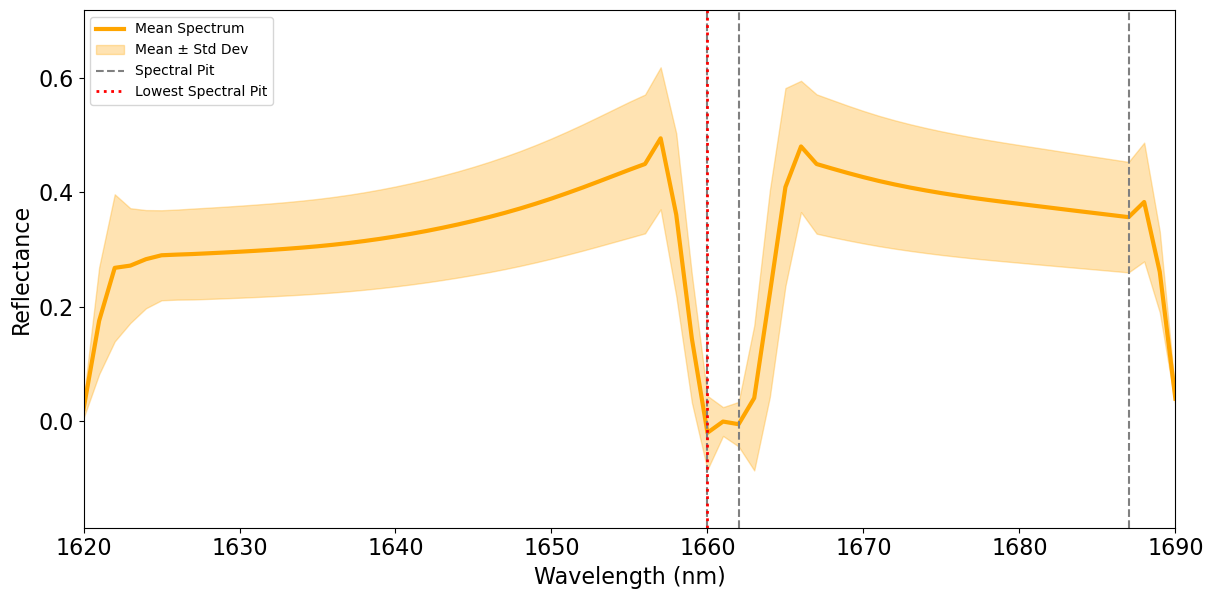

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.spatial import ConvexHull

# Load the data
dataframe_path = r"C:\Users\bongo\OneDrive\Desktop\Phenolic compound\fire.xlsx"
try:
    df = pd.read_excel(dataframe_path)
except Exception as e:
    print(f"Error loading the data: {e}")
    exit()

# Prepare the feature (X) and target (y) variables
X = df.iloc[:, 5:]  # Raw spectral data (400 to 2500 nm)
flavonoids = df.iloc[:, 3]  # Flavonoids column
phenolics = df.iloc[:, 4]   # Phenolics column

# Select only the columns corresponding to the range 1620 to 1690 nm
wavelengths = X.columns.values
mask = (wavelengths >= 1620) & (wavelengths <= 1690)
X_filtered = X.loc[:, mask]

# Perform continuum removal using convex hull
X_cont_removed = np.zeros_like(X_filtered)
for i in range(X_filtered.shape[0]):
    spectrum = X_filtered.iloc[i, :].values
    points = np.column_stack((wavelengths[mask], spectrum))
    hull = ConvexHull(points)
    hull_values = np.zeros_like(spectrum)
    for vertex in hull.vertices:
        hull_values[vertex] = spectrum[vertex]
    X_cont_removed[i, :] = spectrum - hull_values

# Calculate mean and standard deviation
mean_spectrum = np.mean(X_cont_removed, axis=0)
std_spectrum = np.std(X_cont_removed, axis=0)

# Smooth the continuum-removed spectra
smooth_mean_spectrum = savgol_filter(mean_spectrum, window_length=5, polyorder=2)
smooth_std_spectrum = savgol_filter(std_spectrum, window_length=5, polyorder=2)

# Convert to numeric and handle NaN values
smooth_mean_spectrum = np.nan_to_num(pd.to_numeric(smooth_mean_spectrum, errors='coerce'))
smooth_std_spectrum = np.nan_to_num(pd.to_numeric(smooth_std_spectrum, errors='coerce'))

# Ensure all arrays are numeric and of the same shape
wavelengths_masked = pd.to_numeric(wavelengths[mask], errors='coerce')

# Identify the indices of the local minima in the smoothed mean spectrum
minima_indices = np.where((smooth_mean_spectrum[1:-1] < smooth_mean_spectrum[:-2]) & 
                          (smooth_mean_spectrum[1:-1] < smooth_mean_spectrum[2:]))[0] + 1

# Get the wavelengths corresponding to the minima
spectral_pits = wavelengths_masked[minima_indices]

# Plotting
plt.figure(figsize=(12, 6))

# Plot the mean spectrum as a bold solid line in orange
plt.plot(wavelengths_masked, smooth_mean_spectrum, color='orange', label='Mean Spectrum', linewidth=3)

# Calculate bounds for the shaded area
y_lower = smooth_mean_spectrum - smooth_std_spectrum
y_upper = smooth_mean_spectrum + smooth_std_spectrum

# Ensure y-values are valid for fill_between
y_lower = np.nan_to_num(y_lower)
y_upper = np.nan_to_num(y_upper)

# Fill between mean ± std dev as a single shaded orange band with reduced brightness
plt.fill_between(wavelengths_masked, y_lower, y_upper, color='orange', alpha=0.3, label='Mean ± Std Dev')

# Get the minimum value and its index
lowest_index = minima_indices[np.argmin(smooth_mean_spectrum[minima_indices])]
lowest_pit = wavelengths_masked[lowest_index]

# Print the wavelength of the lowest pit
print(f"The wavelength of the lowest spectral pit is: {lowest_pit:.2f} nm")

# Add dashed vertical lines for spectral pits
for pit in spectral_pits:
    plt.axvline(pit, color='grey', linestyle='--', label='Spectral Pit' if pit == spectral_pits[0] else "")

# Add a red dotted line for the lowest pit
plt.axvline(lowest_pit, color='red', linestyle=':', linewidth=2, label='Lowest Spectral Pit')

# Finalize the plot
#plt.title('Continuum Removed Spectra from 1620 to 1690 nm')
plt.xlabel('Wavelength (nm)', fontsize=16)
plt.ylabel('Reflectance', fontsize=16)
plt.legend()
plt.grid(False)
plt.xlim(1620, 1690)
plt.ylim(min(y_lower) - 0.1, max(y_upper) + 0.1)
plt.tight_layout()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()